# Hypnic jerk

A hypnic jerk is a medical designation for that sensation of falling you may have experience while sleeping or about to fall asleep.

Here we use a modified version of the Stokes Sinker to illustrate periodic boundary conditions. The Model is set to be periodic in the vertical direction. The results is that the Sphere will continue to fall forever. Hypnic jerk...

![Hypnic Jerk](./images/HypnicJerk.gif)

In [1]:
from underworld import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
velocity = 1.0 * u.centimeter / u.hour
model_length = 2. * u.meter
model_height = 1. * u.meter
refViscosity = 1e6 * u.pascal * u.second
bodyforce = 200 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_height
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [4]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(-1. * u.meter, -50. * u.centimeter), 
                  maxCoord=(1. * u.meter, 50. * u.centimeter),
                  periodic=[False, True])

In [ ]:
Model.outputDir = "1_06_HypnicJerk"

In [5]:
lightMaterial = Model.add_material(name="Light", shape=GEO.shapes.Layer2D(top=Model.top, bottom=Model.bottom))
heavyMaterial = Model.add_material(name="Heavy", shape=GEO.shapes.Disk(center=(0.,30.*u.centimetre), radius=10. * u.centimetre))

In [6]:
lightMaterial.density = 10 * u.kilogram / u.metre**3
heavyMaterial.density = 500 * u.kilogram / u.metre**3

lightMaterial.viscosity = GEO.ConstantViscosity(1e6 * u.pascal * u.second)
heavyMaterial.viscosity = GEO.ConstantViscosity(1e6 * u.pascal * u.second)

In [7]:
Model.set_velocityBCs(left=[0, 0], right=[0, 0])


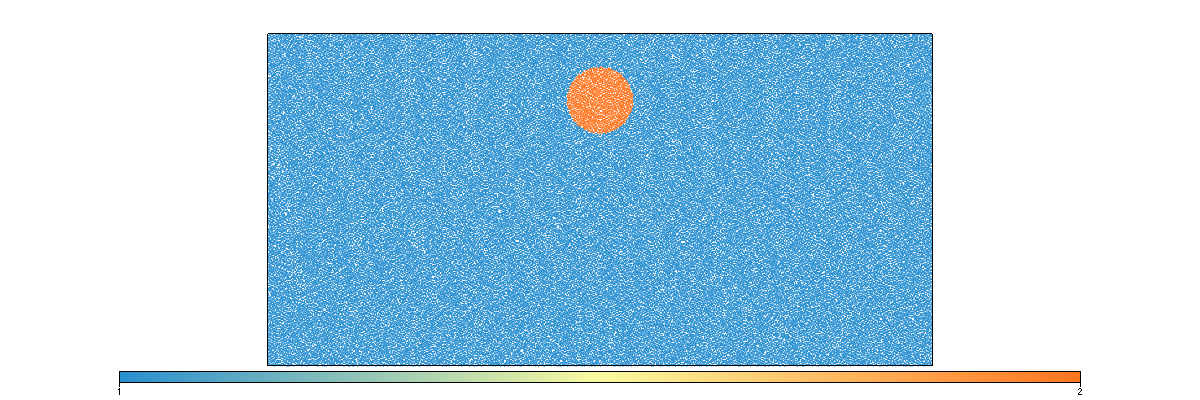

In [8]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, Model.materialField, fn_size=2.0)
Fig.save("Figure_1.png")
Fig.show()

In [9]:
Model.init_model(pressure="lithostatic")

In [10]:
Model.run_for(1.0 * u.hours, checkpoint_interval=5.0 * u.minutes)

Running with UWGeodynamics version 0.9.4-dev-1011449(development)
Step:1 Model Time:  0.016485620283495532 hour dt: 0.016485620283495532 hour (2018-11-11 00:28:34)
Step:2 Model Time:  0.03302588414559417 hour dt: 0.016540263862098642 hour (2018-11-11 00:28:34)
Step:3 Model Time:  0.04953952448281248 hour dt: 0.016513640337218305 hour (2018-11-11 00:28:35)
Step:4 Model Time:  0.06607560527240944 hour dt: 0.016536080789596952 hour (2018-11-11 00:28:36)
Step:5 Model Time:  0.08262345494016467 hour dt: 0.016547849667755226 hour (2018-11-11 00:28:37)
Step:6 Model Time:  0.08333333333333333 hour dt: 0.0007098783931686688 hour (2018-11-11 00:28:39)
Step:7 Model Time:  0.09985776611582034 hour dt: 0.01652443278248701 hour (2018-11-11 00:28:40)
Step:8 Model Time:  0.11641271684519093 hour dt: 0.01655495072937059 hour (2018-11-11 00:28:41)
Step:9 Model Time:  0.13292567887791248 hour dt: 0.01651296203272156 hour (2018-11-11 00:28:42)
Step:10 Model Time:  0.14947833327444124 hour dt: 0.0165526543

1


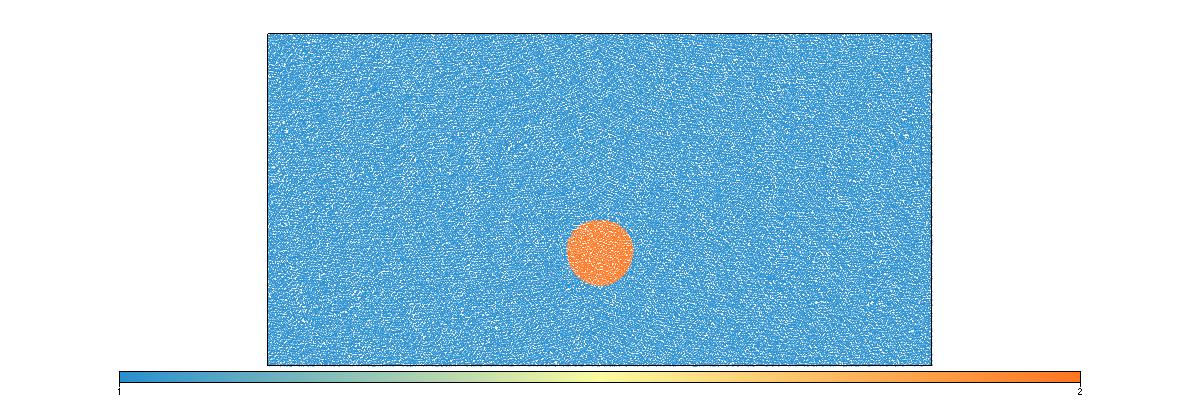

In [12]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, Model.materialField, fn_size=2.0)
Fig.save("Figure_2.png")
Fig.show()


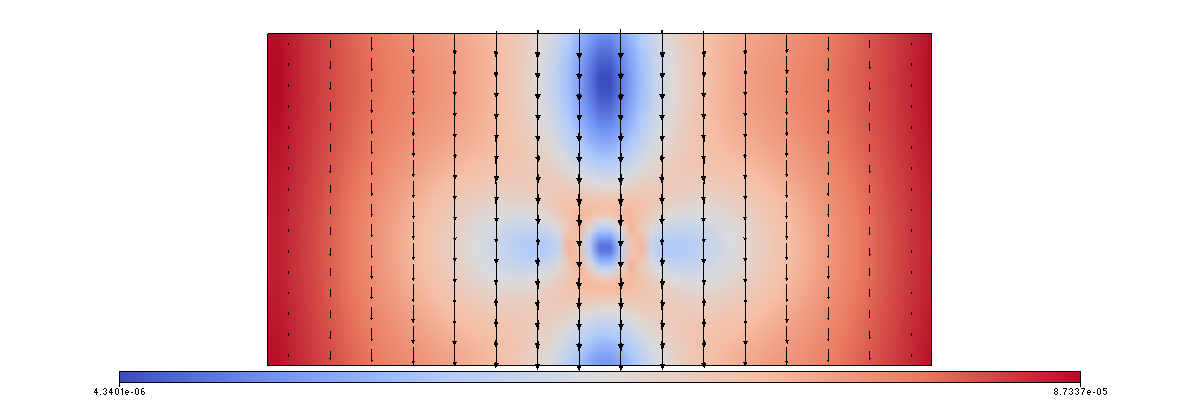

In [14]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Surface(Model.mesh, GEO.dimensionalise(Model.strainRateField, 1.0 / u.second), colours="coolwarm")
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.save("Figure_3.png")
Fig.show()